<a href="https://colab.research.google.com/github/meridethfrey/SLC-Research/blob/master/AggregatedMagnetVariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
import time

In [ ]:
#helper functions

def calcDeltaB(m, beta, rV):
    N = len(m)
    #calculating m0, the average magnetic moment
    m0 = np.mean(m)
    
    #mV gives 2D array that gives magnetic field vector for particular permutation of magnets
    mV = np.array([m[i]*np.array([0, np.sin(beta[i]), np.cos(beta[i])]) for i in range(N)])
    
    #delta gives an array of the difference in magnetic field values of nth magnet with mean 
    delta = m - m0
    #delmV gives a 2D array of the magnetic field difference from mean and direction of the nth magnet as the nth column
    #x,y,z positions (relative to center of circle) as rows 
    delmV = np.array([delta[i]*np.array([0, np.sin(beta[i]), np.cos(beta[i])]) for i in range(N)])
    
    #rnorm finds the norm of rV
    rnorm = np.array([np.linalg.norm(rV[i]) for i in range(N)])
    #nV gives the n-vector to use for this point
    nV = np.array([rV[i]/rnorm[i] for i in range(N)])
    DeltaB = 10**(-7)*np.sum(np.array([(3*(np.dot(delmV[i], nV[i]) * nV[i]) - delmV[i])/(rnorm[i]**3) for i in range(N)]),0)
    return DeltaB

def calcB(m, beta, rV):
    N = len(m)

    #mV gives 2D array that gives magnetic field vector for particular permutation of magnets
    mV = np.array([m[i]*np.array([0, np.sin(beta[i]), np.cos(beta[i])]) for i in range(N)])
    
    #rnorm finds the norm of rV
    rnorm = np.array([np.linalg.norm(rV[i]) for i in range(N)])
    #nV gives the n-vector to use for this point
    nV = np.array([rV[i]/rnorm[i] for i in range(N)])
    B = 10**(-7)*np.sum(np.array([(3*(np.dot(mV[i], nV[i]) * nV[i]) - mV[i])/(rnorm[i]**3) for i in range(N)]),0)
    return B


In [ ]:
def permutation_calculator(width_factor):
    #generate magnets
    N = 8
    numMagnets = 8
    R = 0.0145
    V = (0.25**2*1)*(0.25**3)
    numPoints = 10
    frac = 0.10
    magnets_vals = np.array([.41, .42, .41, .41, .40, .42, .42, .41])
    mean = np.average(magnets_vals)
    standard_dev = np.std(magnets_vals)
    magnets = np.empty(numMagnets)
    normal_distribution = np.random.normal(mean,(width_factor * standard_dev))
    for i in range(8):
        magnets[i] = np.random.normal(mean,(width_factor * standard_dev))
    magnets = np.sort(magnets)
    #setup arrays
    alpha = np.array([n*2*np.pi/N for n in range(N)])
    beta = 2*alpha 
    gamma = np.array([j*2*np.pi/numPoints for j in range(numPoints)])
    x = np.zeros(N)
    y = np.sin(alpha)
    z = np.cos(alpha)
    n0 = np.vstack([x, y, z]).T
    x = frac*R*np.zeros(numPoints)
    y = frac*R*np.sin(gamma)
    z = frac*R*np.cos(gamma)
    P = np.vstack([x, y, z]).T
    #test permutations
    start = time.time()
    p_min = np.zeros(N)
    val_min = np.Infinity
    p_max = np.zeros(N)
    val_max = 0
    for p in permutations(range(numMagnets),N):
        m = 2.71*magnets.take(p)*V/(4*np.pi*10**(-7))
        costV = calcDeltaB(m, beta, R*n0)
        val = np.linalg.norm(costV)
        for point in P:
            rV = np.array([(R*n0[i] - point) for i in range(N)])
            costV = calcDeltaB(m, beta, rV)
            val += np.linalg.norm(costV)        
        if val < val_min:
            val_min = val
            p_min = p
        if val >= val_max:
            val_max = val
            p_max = p
    end = time.time()
    val1, val2 = val_min/mean, val_max/mean
    return val1, val2





In [ ]:
def plot_data(min_vals, max_vals, sd):
    %matplotlib inline
    plt.plot(sd, min_vals, 'bo', label = 'min')
    plt.plot(sd, max_vals, 'ro', label = 'max')
    plt.legend()
    plt.xlabel("Standard Deviation")
    plt.ylabel("General Value (unprocessed)")
    plt.title("Divergence of values as standard deviation increases")

def process_data(vals):
    return true


The box below should run the whole program

minimum values: [0.         0.4019687  1.03139249 1.21292136 1.69579167 2.2667902
 1.6145068  2.19575254 3.30433308 2.82417255 4.44034375 3.79266059
 5.69819533 4.59768392 5.08995352 7.32000054]
maximum values: [ 0.          3.28576079  5.65514412  9.24193341 12.03633358 12.76144087
 18.53320013 22.52068213 24.30092468 27.52520703 32.88594213 34.64736594
 38.70848622 32.49756309 45.41585885 45.45129691]
Standard Deviation: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


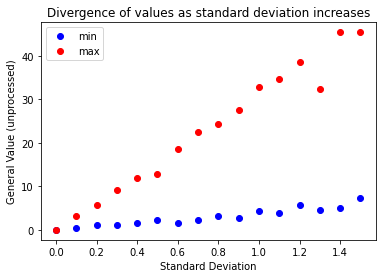

In [ ]:
#Number of Points to Generate
NumPts = 16
#Number of samples to take to generate average
NumSample = 10
#starting multiplicative factor for standard deviation
current_width = 0
#change in factor between each calculation point
delta = .1 


#setup arrays to pull data from later
sd = np.array([])
min_vals = np.array([])
max_vals = np.array([])

for p in range(NumPts):
    sub_min, sub_max = 0, 0
    for q in range(NumSample):
        #print(p, ",", q)
        a, b = permutation_calculator(current_width) 
        sub_min = sub_min + a
        sub_max = sub_max + b
    min = sub_min / NumSample
    max = sub_max / NumSample
    sd = np.append(sd, current_width)
    min_vals = np.append(min_vals, min)
    max_vals = np.append(max_vals, max)
    current_width = current_width + delta
print("minimum values:", min_vals)
print("maximum values:", max_vals)
print("Standard Deviation:", sd)
plot_data(min_vals, max_vals, sd)

        